# AirBnb abuse in Barcelona and current regulations against the touristic bubble

** Mario Zapata **

*mario.zapata@nyu.edu *

## The role of multi-listings in Barcelona

Tourism in the city of Barcelona has been a hot topic since the 2015 municipal elections, when the (now) mayor of Barcelona and housing activist Ada Colau pointed out that the city was starting to show signs of a tourism bubble — meaning that assets prices in the city were rising due to optimist tourism growth expectations. One of her rally issues was the use of traditional urban housing for touristic rentals, which allegedly makes the overall housing prices rise and kicks out residents out of urban spaces as these become more expensive. That is why one of the first measures that her administration took was to fine AirBnb for allowing individuals without a license to post listings on its website. Barcelona became one of the first cities to fine AirBnb, and it did it in two occasions. The last fine imposed to the company was of 600,000 EUR. These fines created controversy — for obvious reasons — but it is unclear whether they solved the problem they were trying to address: housing prices increase due to the rise in AirBnb listings. 


A particular characteristic of the touristic housing landscape of Barcelona is that the city has one of the highest percentage of multiple listings per total listings in the developed world, meaning that a majority of the listings (57%) belongs to hosts who have more than one listing (up to 80, in some cases). This is extraordinariously higher than in the cities of Madrid, Berlin, London, Vienna, Amsterdam, Paris, NYC, Dublin, Copenhaguen, Athens, and many others, where this rate is normally between 15 and 30%. 


This points to the possibility that the tourism bubble in Barcelona may be caused by these multi-listings. Considering that as per [InsideAirbnb](insideairbnb.com), many other potential indicators of AirBnb host abuse are not as dissonant as this one, this possibility does not seem unreasonable. This leads us to the questions: Are multi-hosts responsible for creating a housing bubble, and if so, will the current sanctions imposed — forcing hosts to get municipal licences for their listings — actually fix the current bubble?  





### What characterizes multi-listings in Barcelona? 

The answer to the question of whether multi-listing is leading to abuse goes through understanding what the characteristics of these listings are. A reasonable argument is that these multi-listings are actually regular (non-touristic) rentals (with or without licences) that use AirBnb to advertise themselves, which would explain why there are so many of them. 
We will look into Inside AirBnb data to test this hypothesis, particularly minimum nights requirements, aggregated review score, number of reviews per month, availability per year and price per night. I will plot these listing characteristics against the calculated number of listings posted by the same host. 

In [1]:
import pandas as pd 
import sys                             # system module
import pandas as pd                    # data package
import matplotlib as mpl               # graphics package
import matplotlib.pyplot as plt         # pyplot module
import datetime as dt                  # date and time module
import numpy as np
import seaborn as sns                  #seaborn module 


%matplotlib inline

/Users/sglyon/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
url1 = "http://data.insideairbnb.com/spain/catalonia"
url2 = "/barcelona/2016-12-08/data/listings.csv.gz"
full_df = pd.read_csv(url1+url2, compression="gzip")

/Users/sglyon/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (43,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
full_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [4]:
df = full_df[["host_id","minimum_nights","maximum_nights","license","reviews_per_month","latitude",'host_total_listings_count', "longitude","neighbourhood_cleansed","availability_365","price",
              "monthly_price","room_type","calculated_host_listings_count",'review_scores_rating']]

In [5]:
df = df.rename(columns={'minimum_nights': 'Minimum Nights', 'maximum_nights':'Maximum Nights',
                        'license':'License','availability_365':'Yearly Availability', 'price':'Price',
                        'review_scores_rating':'Ratings',"room_type":"Listing Type",
                        'calculated_host_listings_count':"Listings Count",'reviews_per_month':"Reviews per month",'neighbourhood_cleansed':"Neighbourhood"})


In [6]:
df.replace({'Price': {'\$': ''}}, regex=True, inplace=True)
df.replace({'Price': {'\,': ''}}, regex=True, inplace=True)
df['Price'] = df['Price'].astype('float64', copy=False)

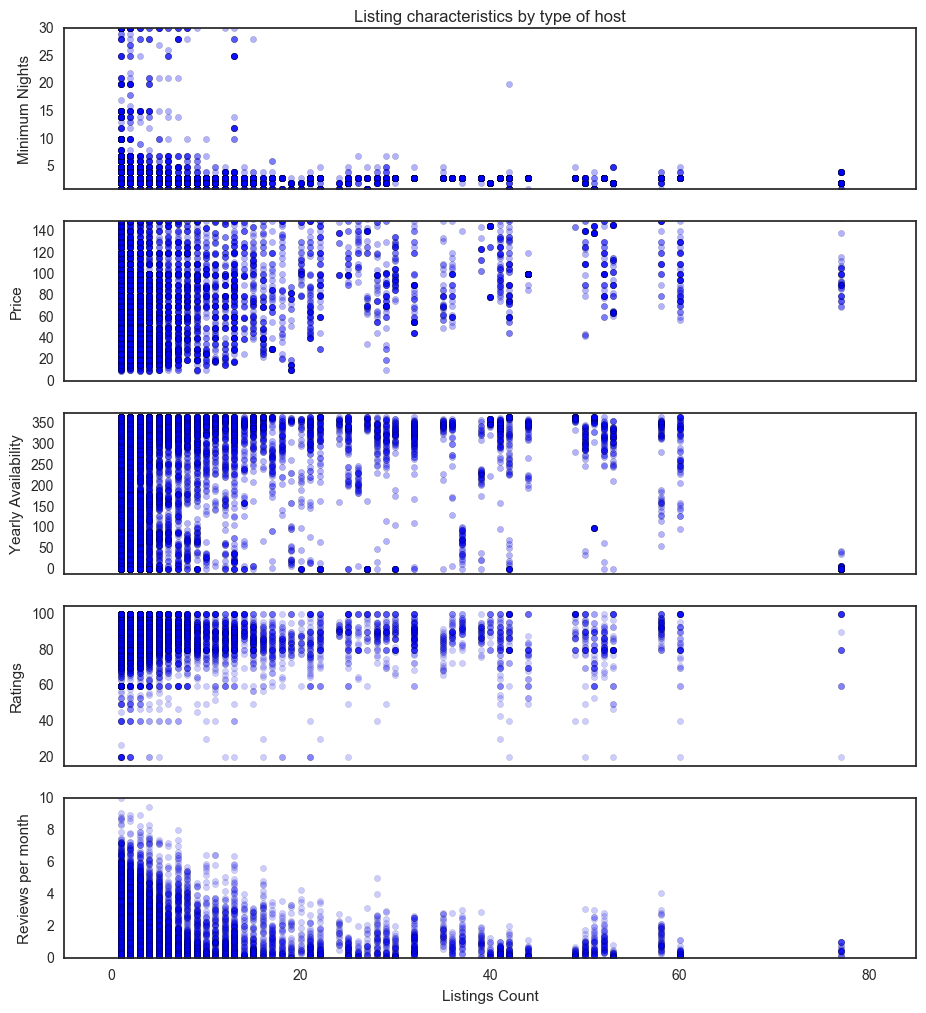

In [7]:
plt.style.use('seaborn-white')
fig, ax = plt.subplots(5, sharex=True, sharey=False,)
plt.title('', fontsize=15, loc='center')
df.plot.scatter(ax=ax[0], 
                x="Listings Count",
                y="Minimum Nights",  
                alpha=0.3, 
                ylim = (1,30),
                figsize=(11,12), 
                color = "b",
                title='Listing characteristics by type of host',
                xlim = (0,80) )
df.plot.scatter(ax=ax[1],
                x="Listings Count", 
                y="Price", 
                alpha=0.3,
                figsize=(11, 12), 
                title='',
                color = "b",
                ylim = (0,150),
                xlim = (0,80))
df.plot.scatter(ax=ax[2],
                x="Listings Count", 
                y="Yearly Availability", 
                alpha=0.3, 
                title='',
                figsize=(11, 12), 
                color = "b",
                ylim = (-10,375), 
                xlim = (-1,80))
df.plot.scatter(ax=ax[3],
                x="Listings Count", 
                y="Ratings", 
                alpha=0.2, 
                title='',
                figsize=(11, 12), 
                color = "b",
                ylim = (15,105), 
                xlim = (-5,85))
df.plot.scatter(ax=ax[4],
                x="Listings Count", 
                y="Reviews per month", 
                alpha=0.2, 
                title='',
                figsize=(11, 12), 
                color = "b",
                ylim = (0,10),
                xlim = (-5,85))



These plots offer us an interesting insight. While there aren't clear cutting lines between one type of homes and the other, we can see some interesting trends as the number of listings posted by the same host increases. Overall, the findings suggest something different than our initial hypothesis: they suggest that these listings are not residential but higher end, slightly longer-term touristic rentals.

* **Lower likelyhood of having high minimum night requirements**

As the graph shows, no listings past the 10/15 listing count has high minimum-night requirements. High minimum night requirements (over 10-30 days) normally indicate abuse (as per Inside AirBnb), as it signals that the apartment is being rented for long periods of time. This indicates that hosts with many listings do not necessarily set lower boundaries in terms of how long their guests' stay must be. 

* **Higher quality**

As the "Price" and "Ratings" score shows, homes in a high listing count tend to fare better in terms of how much guests value their services. Customers are normally ready to pay more and rate higher homes that belong to a large multi-listing. 

* **Lower guest turns, but all year round ** 


Assuming that the number of reviews per month is indicative of the number of guests the home has had (which should be a relatively accurate representation, since in AirBnb it is in the interest of both hosts and guests to review each other), the graph shows that homes in greater listing counts are less likely to have many guests per month. This may be because these listings are of higher quality, and so they are picked for slightly longer stays (possibly even for longer term sublets). Furthermore, whereas homes with a lower listings count are more diverse in terms of how available they are yearly (there are equally distributed dots for homes in listing counts of up to 4 listings), homes in higher listing counts are available all year. 





/Users/sglyon/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:898: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


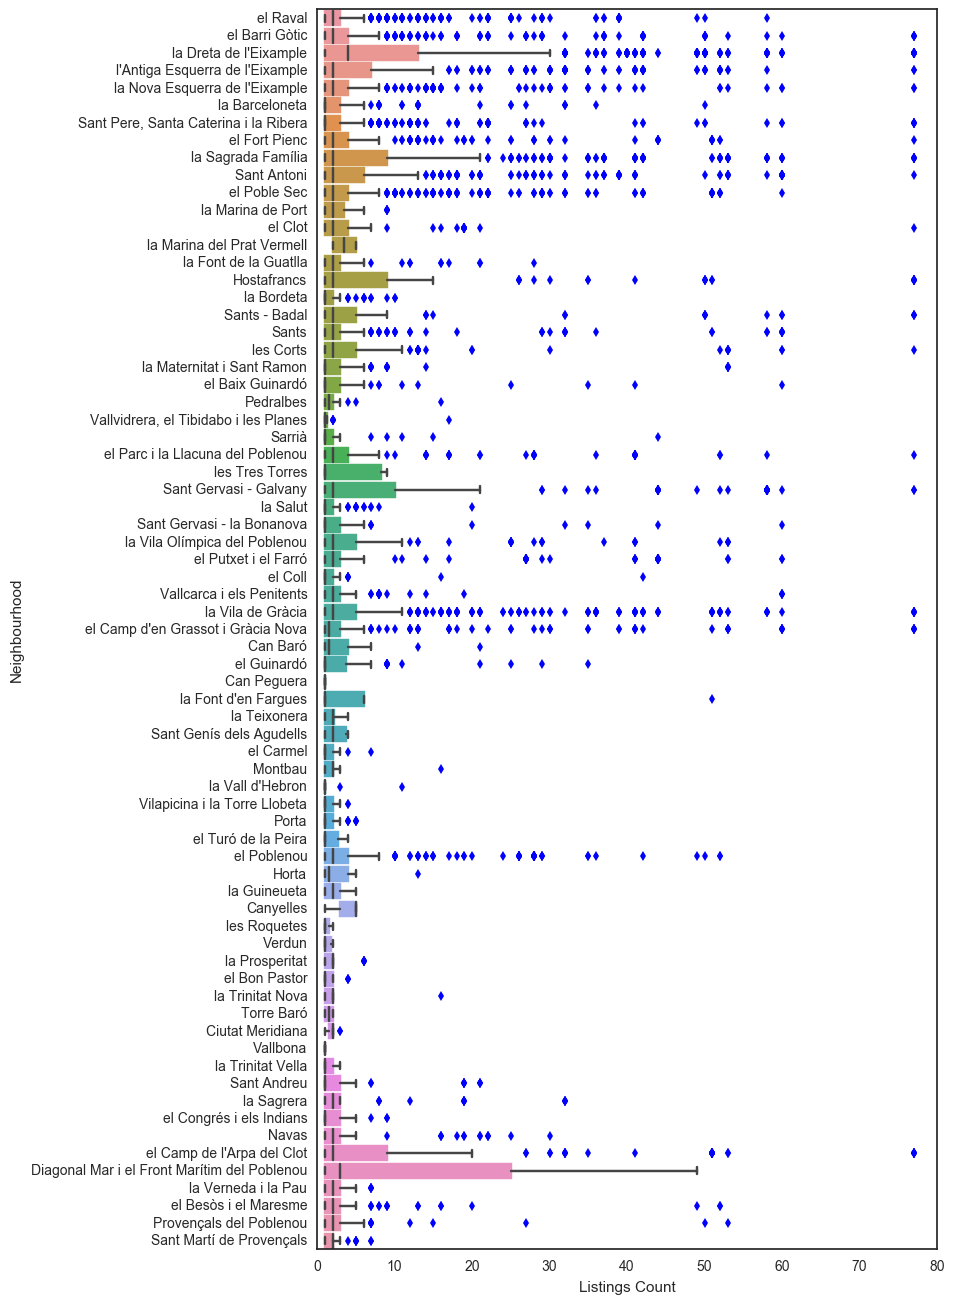

In [8]:
fig, ax = plt.subplots(figsize=(8, 16)) 
sns.boxplot(x="Listings Count", y='Neighbourhood',data=df, orient="h")

The graph above confirms that homes in high listing counts are more likely to be in the higher end range by showing us the presence of these businesses in higher income neighbourhoods. This can be observed in that these neighbourhoods show higher listing counts medians than others (even though many of these are in touristic areas and are thus likely to have high individual listings too). "La Vila de Gracia" is a good example of this: Despite being in one of the most densily populated and most touristic areas of the city, it shows a higher median listing count than others (rounding to 3 listing count per home), with a wide range of upper-level outliers. 

##### Summary



Overall, these graphs show that listings in high listing counts are likely to belong to individuals or companies that dedicate their real estate exclusively for touristic purposes, targeting customers in the high end market, and normally with lower guest turns. It also shows that often homes in up to 5 listing counts are likely to be of very diverse nature. I attribute this to the these homes belonging to an array of very diverse hosts, i.e. hosts who list 4 private rooms in their own residential house and hosts who list 4 entire homes they own, mixed in the same group. 


## Multi-listings and current regulations 

The greatest concern of the mayor of Barcelona Ada Colau seems to be that all homes listed in AirBnb get a touristic license. However, is that likely to solve the current problem of a touristic housing bubble? In this section we observe the distribution of licenses in the variable "license". This variable includes either NaN (no values) if the home does not have a posted license or the date when the license was approved (in a string). 

In [9]:
licensedf = df[["License",'Listings Count','Listing Type',
                "host_id","Minimum Nights",
                "latitude", 
                "longitude","Neighbourhood","Yearly Availability","Price",
                'Ratings']]
licensedf = licensedf.dropna() # we drop all entries without a license (no other field has missing data),
# (our license rate is similar to that calculated by Inside AirBnb)

In [10]:
licensedf.describe()

,Listings Count,host_id,Minimum Nights,latitude,longitude,Yearly Availability,Price,Ratings
count,2973.000000,2.973000e+03,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000
mean,12.598722,1.082139e+07,3.090817,41.392444,2.166824,272.131517,125.381769,89.180289
std,15.256954,1.367811e+07,4.912062,0.013467,0.017585,99.243589,92.763665,8.412549
min,1.000000,1.070400e+04,1.000000,41.351784,2.091586,0.000000,12.000000,20.000000
25%,2.000000,2.230810e+06,2.000000,41.381071,2.157149,235.000000,75.000000,85.000000
50%,6.000000,5.729069e+06,3.000000,41.392264,2.165985,312.000000,100.000000,91.000000
75%,17.000000,1.308753e+07,3.000000,41.402307,2.176043,343.000000,145.000000,95.000000
max,60.000000,9.631001e+07,180.000000,41.452031,2.221733,365.000000,1170.000000,100.000000


Overall, we observe that a very small number of homes have licences. Let us observe the distribution of licensed listings versus the overall count per type of home.

/Users/sglyon/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:898: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


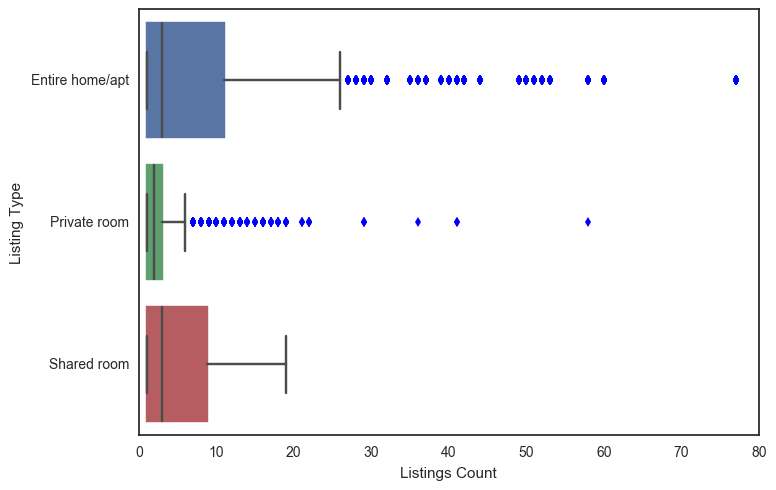

In [11]:
plt.style.use('seaborn-notebook')
sns.boxplot(x="Listings Count", y='Listing Type',data=df, order = ["Entire home/apt",'Private room','Shared room'])


/Users/sglyon/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:898: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


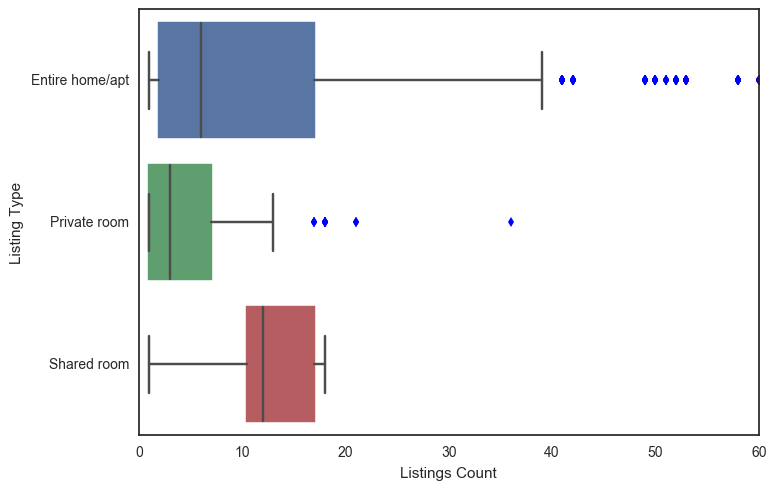

In [12]:
sns.boxplot(x="Listings Count", y='Listing Type',data=licensedf)

Here we see two interesting patterns. 1) Even though private rooms are the most common listing option as per Inside AirBnb, among licenced listings "Entire home/apt" is the most popular option. 2) When we observe all homes, the median observations for each time of listing is normally much closer to lower listings count than when we observe only licensed listings. This suggests that even though a majority of the listings does not have a license, the number of licenses is proportionately higher for homes in higher listing counts than it is for others. This means that hosts with many listings are more likely to license their homes than hosts with fewer listings. We can see this trend better by looking at the following variable descriptions.

In [13]:
df['Multiple Listings'] = df['Listings Count'] >= 2

In [14]:
df['Multiple Listings'].describe()

count     17369
unique        2
top        True
freq       9986
Name: Multiple Listings, dtype: object

In [15]:
df['Multiple Listings'] = df['Listings Count'] >= 3

In [16]:
df['Multiple Listings'].describe()

count     17369
unique        2
top       False
freq      10483
Name: Multiple Listings, dtype: object

In [17]:
df['Multiple Listings'] = df['Listings Count'] >= 4

In [18]:
df['Multiple Listings'].describe()

count     17369
unique        2
top       False
freq      12133
Name: Multiple Listings, dtype: object

In [19]:
df['Multiple Listings'] = df['Listings Count'] >= 5

In [20]:
df['Multiple Listings'].describe()

count     17369
unique        2
top       False
freq      13021
Name: Multiple Listings, dtype: object

In [21]:
licensedf['Multiple Listings'] = licensedf['Listings Count'] >= 2

In [22]:
licensedf['Multiple Listings'].describe()

count     2973
unique       2
top       True
freq      2282
Name: Multiple Listings, dtype: object

In [23]:
licensedf['Multiple Listings'] = licensedf['Listings Count'] >= 3

In [24]:
licensedf['Multiple Listings'].describe()

count     2973
unique       2
top       True
freq      1989
Name: Multiple Listings, dtype: object

In [25]:
licensedf['Multiple Listings'] = licensedf['Listings Count'] >= 4

In [26]:
licensedf['Multiple Listings'].describe()

count     2973
unique       2
top       True
freq      1760
Name: Multiple Listings, dtype: object

In [27]:
licensedf['Multiple Listings'] = licensedf['Listings Count'] >= 5

In [28]:
licensedf['Multiple Listings'].describe()

count     2973
unique       2
top       True
freq      1612
Name: Multiple Listings, dtype: object

As we can see above, more than half the listings that have licenses belong to hosts with more than 5 homes listed. This seems disproportionate, considering that less than a third of total listings belongs in this category. In other words, this confirms our hypothesis that homes in higher listing counts are more likely to have a license, and thus conform best to the standards set by the Town Hall of Barcelona. 

This also suggests the following: since a majority of listings in Barcelona are multi-listings, the mayor's policy of enforcing licencing is likely to have limited effects in the seemingly extensive practice for hosts with many listings of using AirBnb to list higher end homes. While it is true that only a minority of these have licenses, in order to avoid a housing bubble, new policies should be put in place to control licensed homes owned by hosts with multiple listings, such as a corporate or luxury tax, since otherwise these homes will continue to contribute to the increase in overall housing prices in the city. 

/Users/sglyon/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:898: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


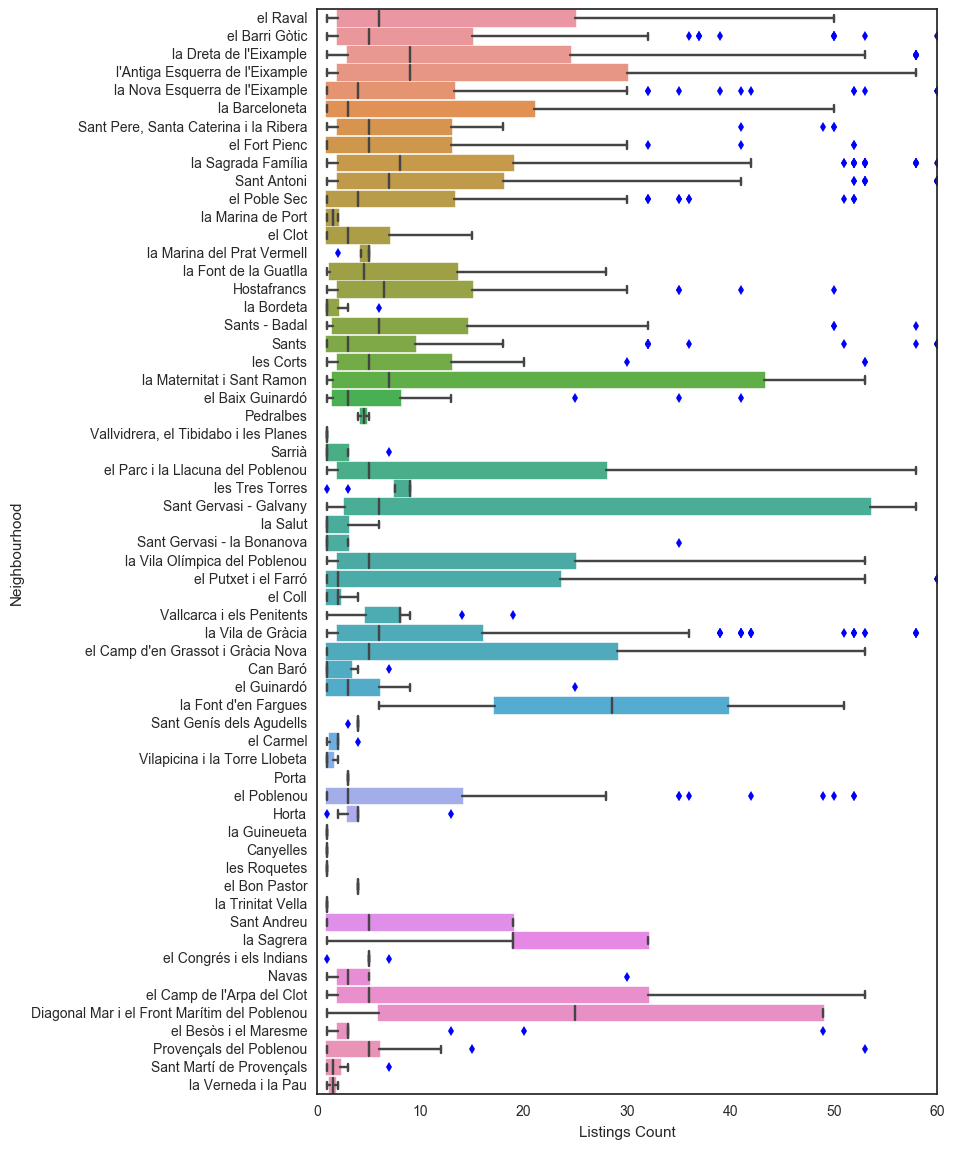

In [29]:
fig, ax = plt.subplots(figsize=(8, 14)) 
sns.boxplot(x="Listings Count", y='Neighbourhood',data=licensedf, orient="h")

On the other hand, the graph above, while confirming what we have observed before — multiple listings are more likely to be licensed — it brings us to consider something important when implementing new policies: licensed homes owned by hosts with high listing counts are currently the only AirBnb-listed options in many neighbourhoods. This means that whatever the new policy implemented is, Barcelona legislators should bear in mind that these homes are satisfying the market demand for this type of housing for certain neighbourhoods in ways that no other AirBnb homes do. Furthermore, they make up a large portion of the supply in a large groups of neighbourhoods (such as La Vila de Gracia), so imposing restrictions in these types of homes will constrain tourism in the city. 

## Conclusion

We study the characteristics of homes in multiple listings in the city, and explore some policymaking options for regulating the touristic housing bubble in the city. We conclude that while particularly prevalent and potentially dangerous for the housing market in the city, hosts with multiple listings do not normally have more abusive practices than any other high-end medium-term sublet, and that they may have less abusive practices than many individual listings (we conclude that likely these hosts do not focus on long term residential rentals). However, this does not mean that they are not currently raising overall housing prices (many of them legally with a town hall license), contributing to the city prices bubble. The prevalence of this practice suggests that the actions of hosts with multiple listings must be impactful in setting the rules for al other listings.  

This is why the Barcelona town hall will possibly need further meausures than simply enforcing current license regulations. These measures could include taxing hosts with over a certain number of listings for income earned or number of listings posted. Nevertheless, any new measure should keep in mind the service many of these licensed homes are paying in a majority of neighbourhoods where there are not many other legal housing options, and should thus keep a balance between controlling local prices while meeting the demands of the market. 